Install and load libraries

In [3]:
!pip install pyLDAvis
!pip install spacy
! pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
import os
import platform
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

     |████████████████████████████████| 12.0 MB 248 kB/s            
  Preparing metadata (setup.py) ... done


In [5]:
import en_core_web_sm
nlp = en_core_web_sm.load()

import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models
from spacy.lang.en import English

Load the dataset

In [19]:
PKL_PATH = 'data/pkl'
df = pd.read_pickle(os.path.join(PKL_PATH, "final_subset_flaired.pkl"))
df['date'] = pd.DatetimeIndex(df['date']) #  set the date variable 
df = df.drop(columns=['quoteID','qids', 'probas','urls','phase', 'flair_score', 'subset', 'id', 'givenName', 'familyName', 'unaccentedGivenName', 'honorificSuffix', 'unaccentedFamilyName','middleName', 'honorificPrefix','deathYear', 'birthYear', 'textblob_score'])
df.head(3)

,Unnamed: 0,quotation,speaker,date,numOccurrences,congresses,unaccentedMiddleName,nickName,position,stateName,parties,NLTK score,neg,neu,pos,compound
0,1356,the bill that republicans tried to place in th...,dianne feinstein,2015-12-11 19:13:13,5.0,"[{'position': 'Senator', 'congressNumber': 114...",NaN,NaN,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.000
1,1358,"she is the leading candidate, whether it be re...",dianne feinstein,2015-03-08 08:00:00,5.0,"[{'position': 'Senator', 'congressNumber': 114...",NaN,NaN,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.000
2,1361,i hope that once secretary clinton has testifi...,dianne feinstein,2015-10-21 20:07:39,1.0,"[{'position': 'Senator', 'congressNumber': 114...",NaN,NaN,Senator,CA,Democrat,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.0,0.745,0.255,0.802


Subset into parties

In [20]:
dem = df[df["parties"] == "Democrat"]
rep = df[df["parties"] == "Republican"]

Let's start with democrats and subset within the subset into years

In [31]:
dem_2015 = dem[(dem['date']> "2015-01-01") & (dem['date']< "2015-12-31")]
dem_2016 = dem[(dem['date']> "2016-01-01") & (dem['date']< "2016-12-31")]
dem_2017 = dem[(dem['date']> "2017-01-01") & (dem['date']< "2017-12-31")]
dem_2018 = dem[(dem['date']> "2018-01-01") & (dem['date']< "2018-12-31")]
dem_2019 = dem[(dem['date']> "2019-01-01") & (dem['date']< "2019-12-31")]
dem_2020 = dem[(dem['date']> "2020-01-01") & (dem['date']< "2020-12-31")]

Preprocessing the raw text

In [32]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

processed_docs = []
for doc in nlp.pipe(dem_2015['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_dem_2015 = processed_docs
del processed_docs

In [38]:
processed_docs = []
for doc in nlp.pipe(dem_2016['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_dem_2016 = processed_docs
del processed_docs

In [40]:
processed_docs = []
for doc in nlp.pipe(dem_2017['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_dem_2017 = processed_docs
del processed_docs

In [41]:
processed_docs = []
for doc in nlp.pipe(dem_2018['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_dem_2018 = processed_docs
del processed_docs

In [42]:
processed_docs = []
for doc in nlp.pipe(dem_2019['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_dem_2019 = processed_docs
del processed_docs

In [39]:
processed_docs = []
for doc in nlp.pipe(dem_2020['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_dem_2020 = processed_docs
del processed_docs

Bigrams for every subset

In [43]:
from gensim.models.phrases import Phrases

In [45]:
# Add bigrams to docs (only ones that appear 15 times or more).
bigram_15 = Phrases(docs_dem_2015, min_count=15)

for idx in range(len(docs_dem_2015)):
    for token in bigram_15[docs_dem_2015[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_dem_2015[idx].append(token)

In [46]:
# Add bigrams to docs (only ones that appear 15 times or more).
bigram_16 = Phrases(docs_dem_2016, min_count=15)

for idx in range(len(docs_dem_2016)):
    for token in bigram_16[docs_dem_2016[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_dem_2016[idx].append(token)

In [47]:
# Add bigrams to docs (only ones that appear 15 times or more).
bigram_17 = Phrases(docs_dem_2017, min_count=15)

for idx in range(len(docs_dem_2017)):
    for token in bigram_17[docs_dem_2017[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_dem_2017[idx].append(token)

In [48]:
# Add bigrams to docs (only ones that appear 15 times or more).
bigram_18 = Phrases(docs_dem_2018, min_count=15)

for idx in range(len(docs_dem_2018)):
    for token in bigram_18[docs_dem_2018[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_dem_2018[idx].append(token)

In [49]:
# Add bigrams to docs (only ones that appear 15 times or more).
bigram_19 = Phrases(docs_dem_2019, min_count=15)

for idx in range(len(docs_dem_2019)):
    for token in bigram_19[docs_dem_2019[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_dem_2019[idx].append(token)

In [50]:
# Add bigrams to docs (only ones that appear 15 times or more).
bigram_20 = Phrases(docs_dem_2020, min_count=15)

for idx in range(len(docs_dem_2020)):
    for token in bigram_20[docs_dem_2020[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_dem_2020[idx].append(token)

Create a dictionary representation of the documents, and filter out frequent and rare words for every subset.

In [74]:
from gensim.corpora import Dictionary
dictionary_dem_2015 = Dictionary(docs_dem_2015)
dictionary_dem_2016 = Dictionary(docs_dem_2016)
dictionary_dem_2017 = Dictionary(docs_dem_2017)
dictionary_dem_2018 = Dictionary(docs_dem_2018)
dictionary_dem_2019 = Dictionary(docs_dem_2019)
dictionary_dem_2020 = Dictionary(docs_dem_2020)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5

dictionary_dem_2015.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_dem_2016.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_dem_2017.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_dem_2018.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_dem_2019.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_dem_2020.filter_extremes(no_below=min_wordcount, no_above=max_freq)


# Bag-of-words representation of the documents.
corpus_dem_2015 = [dictionary_dem_2015.doc2bow(doc) for doc in docs_dem_2015]
corpus_dem_2016 = [dictionary_dem_2016.doc2bow(doc) for doc in docs_dem_2016]
corpus_dem_2017 = [dictionary_dem_2017.doc2bow(doc) for doc in docs_dem_2017]
corpus_dem_2018 = [dictionary_dem_2018.doc2bow(doc) for doc in docs_dem_2018]
corpus_dem_2019 = [dictionary_dem_2019.doc2bow(doc) for doc in docs_dem_2019]
corpus_dem_2020 = [dictionary_dem_2020.doc2bow(doc) for doc in docs_dem_2020]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens 2015: %d' % len(dictionary_dem_2015))
print('Number of chunks 2015: %d' % len(corpus_dem_2015))

print('Number of unique tokens 2016: %d' % len(dictionary_dem_2016))
print('Number of chunks 2016: %d' % len(corpus_dem_2016))

print('Number of unique tokens 2017: %d' % len(dictionary_dem_2017))
print('Number of chunks 2017: %d' % len(corpus_dem_2017))

print('Number of unique tokens 2018: %d' % len(dictionary_dem_2018))
print('Number of chunks 2018: %d' % len(corpus_dem_2018))

print('Number of unique tokens 2019: %d' % len(dictionary_dem_2019))
print('Number of chunks 2019: %d' % len(corpus_dem_2019))

print('Number of unique tokens 2020: %d' % len(dictionary_dem_2020))
print('Number of chunks 2020: %d' % len(corpus_dem_2020))

Number of unique tokens 2015: 2281
Number of chunks 2015: 5336
Number of unique tokens 2016: 2460
Number of chunks 2016: 6259
Number of unique tokens 2017: 4195
Number of chunks 2017: 11870
Number of unique tokens 2018: 4036
Number of chunks 2018: 11148
Number of unique tokens 2019: 3936
Number of chunks 2019: 11964
Number of unique tokens 2020: 1539
Number of chunks 2020: 3038


LDA Modeling: 3 topic per year

In [163]:
from gensim.models import LdaMulticore
params = {'passes': 20, 'random_state': 16}
base_models = dict()
num_topics = 3

In [200]:
%time model_dem_2015 = gensim.models.LdaModel(corpus_dem_2015, num_topics=num_topics, \
                                  id2word=dictionary_dem_2015, \
                                  passes=10, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_dem_2015.keys()))

CPU times: user 31.4 s, sys: 292 ms, total: 31.6 s
Wall time: 34.2 s


In [531]:
%time model_dem_2016 = gensim.models.LdaModel(corpus_dem_2016, num_topics=num_topics, \
                                  id2word=dictionary_dem_2016, \
                                  passes=20, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_dem_2016.keys()))

CPU times: user 38.6 s, sys: 353 ms, total: 38.9 s
Wall time: 39.8 s


In [212]:
%time model_dem_2017 = gensim.models.LdaModel(corpus_dem_2017, num_topics=num_topics, \
                                  id2word=dictionary_dem_2017, \
                                  passes=25, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_dem_2017.keys()))

CPU times: user 2min 3s, sys: 631 ms, total: 2min 4s
Wall time: 2min 6s


In [181]:
%time model_dem_2018 = gensim.models.LdaModel(corpus_dem_2018, num_topics=num_topics, \
                                  id2word=dictionary_dem_2018, \
                                  passes=20, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_dem_2018.keys()))

CPU times: user 1min 40s, sys: 1.03 s, total: 1min 41s
Wall time: 1min 45s


In [182]:
%time model_dem_2019 = gensim.models.LdaModel(corpus_dem_2019, num_topics=num_topics, \
                                  id2word=dictionary_dem_2019, \
                                  passes=20, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_dem_2019.keys()))

CPU times: user 1min 58s, sys: 1.37 s, total: 2min
Wall time: 2min 4s


In [222]:
%time model_dem_2020 = gensim.models.LdaModel(corpus_dem_2020, num_topics=num_topics, \
                                  id2word=dictionary_dem_2020, \
                                  passes=25, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_dem_2020.keys()))

CPU times: user 42.2 s, sys: 425 ms, total: 42.6 s
Wall time: 44.2 s


Let's discover what the topic are

In [191]:
for i,topic in model_dem_2015.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.042*"republicans" + 0.020*"republican" + 0.015*"woman" + 0.013*"health" + 0.012*"care" + 0.009*"committee" + 0.009*"want" + 0.008*"time" + 0.007*"think" + 0.007*"president"

1: 0.044*"republican" + 0.024*"trump" + 0.021*"party" + 0.019*"donald" + 0.018*"donald_trump" + 0.015*"donald trump" + 0.014*"republican_party" + 0.012*"candidate" + 0.011*"people" + 0.011*"republicans"

2: 0.043*"republicans" + 0.029*"republican" + 0.015*"democrats" + 0.014*"work" + 0.013*"house" + 0.012*"bill" + 0.010*"vote" + 0.009*"congress" + 0.008*"need" + 0.007*"security"



In [192]:
for i,topic in model_dem_2016.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.080*"donald" + 0.079*"donald_trump" + 0.066*"donald trump" + 0.018*"republican" + 0.015*"party" + 0.011*"clinton" + 0.010*"republican_party" + 0.009*"people" + 0.008*"hillary" + 0.008*"think"

1: 0.030*"republicans" + 0.020*"know" + 0.019*"donald" + 0.019*"donald_trump" + 0.017*"republican" + 0.016*"think" + 0.014*"donald trump" + 0.013*"president" + 0.011*"people" + 0.010*"want"

2: 0.032*"republicans" + 0.028*"republican" + 0.011*"democrats" + 0.011*"mccain" + 0.010*"house" + 0.010*"people" + 0.010*"john" + 0.009*"congress" + 0.009*"work" + 0.009*"john_mccain"



In [193]:
for i,topic in model_dem_2017.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.056*"president" + 0.048*"trump" + 0.043*"president_trump" + 0.007*"administration" + 0.007*"american" + 0.006*"country" + 0.006*"congress" + 0.005*"action" + 0.005*"people" + 0.005*"republicans"

1: 0.065*"trump" + 0.045*"donald" + 0.044*"donald_trump" + 0.034*"donald trump" + 0.021*"president" + 0.011*"president_trump" + 0.010*"think" + 0.010*"house" + 0.009*"white" + 0.009*"investigation"

2: 0.038*"republicans" + 0.029*"republican" + 0.018*"care" + 0.018*"health" + 0.017*"bill" + 0.012*"tax" + 0.012*"work" + 0.012*"people" + 0.012*"democrats" + 0.010*"health_care"



In [194]:
for i,topic in model_dem_2018.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.027*"republicans" + 0.011*"work" + 0.011*"people" + 0.010*"republican" + 0.009*"care" + 0.009*"family" + 0.009*"health" + 0.008*"bill" + 0.008*"democrats" + 0.007*"tax"

1: 0.053*"republican" + 0.033*"republicans" + 0.018*"house" + 0.016*"think" + 0.015*"party" + 0.014*"democrats" + 0.010*"senate" + 0.010*"vote" + 0.009*"democratic" + 0.008*"people"

2: 0.078*"trump" + 0.054*"president" + 0.040*"president_trump" + 0.028*"donald" + 0.028*"donald_trump" + 0.022*"donald trump" + 0.006*"investigation" + 0.005*"people" + 0.005*"country" + 0.005*"policy"



In [188]:
for i,topic in model_dem_2019.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.030*"republicans" + 0.027*"republican" + 0.024*"president" + 0.015*"democrats" + 0.012*"people" + 0.011*"work" + 0.011*"senate" + 0.009*"bill" + 0.008*"care" + 0.008*"want"

1: 0.059*"donald" + 0.051*"donald_trump" + 0.046*"donald trump" + 0.017*"think" + 0.016*"president" + 0.012*"people" + 0.012*"republican" + 0.011*"country" + 0.011*"party" + 0.010*"want"

2: 0.062*"president" + 0.011*"congress" + 0.010*"impeachment" + 0.009*"house" + 0.008*"national" + 0.007*"election" + 0.007*"power" + 0.007*"investigation" + 0.007*"committee" + 0.006*"office"



In [195]:
for i,topic in model_dem_2020.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.055*"donald" + 0.048*"donald trump" + 0.036*"donald_trump" + 0.024*"president" + 0.019*"beat" + 0.013*"beat_donald" + 0.012*"election" + 0.012*"woman" + 0.009*"biden" + 0.008*"people"

1: 0.052*"president" + 0.017*"republicans" + 0.015*"senate" + 0.015*"house" + 0.013*"republican" + 0.010*"congress" + 0.010*"american" + 0.009*"vote" + 0.008*"war" + 0.008*"people"

2: 0.025*"president" + 0.022*"republican" + 0.021*"donald" + 0.019*"donald_trump" + 0.014*"republicans" + 0.013*"donald trump" + 0.013*"people" + 0.011*"think" + 0.009*"need" + 0.009*"democrats"



Visualization per year of the topics

In [201]:
%matplotlib inline
vis_dem_2015 = pyLDAvis.gensim_models.prepare(topic_model=model_dem_2015, corpus=corpus_dem_2015, dictionary=dictionary_dem_2015)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_dem_2015)
# Topic 1: Health care and planned parenthood (women)
# Topic 2: Security, vote on a bill, congress and senate 
# Topic 3: Presidential elections: candidates from the republican party

In [533]:
%matplotlib inline
vis_dem_2016 = pyLDAvis.gensim_models.prepare(topic_model=model_dem_2016, corpus=corpus_dem_2016, dictionary=dictionary_dem_2016)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_dem_2016)
# Topic 1: Presidential election (Clinton)
# Topic 2: SUPREME COURT
# TOpic 3: violence, gun control

In [214]:
%matplotlib inline
vis_dem_2017 = pyLDAvis.gensim_models.prepare(topic_model=model_dem_2017, corpus=corpus_dem_2017, dictionary=dictionary_dem_2017)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_dem_2017)

# Topic 1: Trump and Elections
# Topic 2: Healthcare
# Topic 3: Tax Cut

In [215]:
%matplotlib inline
vis_dem_2018 = pyLDAvis.gensim_models.prepare(topic_model=model_dem_2018, corpus=corpus_dem_2018, dictionary=dictionary_dem_2018)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_dem_2018)

# Topic 1: Trump and investigation, intelligence
# Topic 2: Health Care
# Topic 3: Mccain

In [218]:
%matplotlib inline
vis_dem_2019 = pyLDAvis.gensim_models.prepare(topic_model=model_dem_2019, corpus=corpus_dem_2019, dictionary=dictionary_dem_2019)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_dem_2019)

# Topic 1: Healthcare
# Topic 2: National security , investigation
# Topic 3: TRUMP and elections 


In [223]:
%matplotlib inline
vis_dem_2020 = pyLDAvis.gensim_models.prepare(topic_model=model_dem_2020, corpus=corpus_dem_2020, dictionary=dictionary_dem_2020)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_dem_2020)

# Topic 1: National Security
# Topic 2: election president, beat donald trump
# Topic 3: Healthcare 

In [311]:
topics_dem_2015 = [model_dem_2015[corpus_dem_2015[i]] for i in range(len(docs_dem_2015))]

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

document_topic_dem_2015 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_dem_2015]) \
  .reset_index(drop=True).fillna(0)

document_topic_dem_2015['max_topic'] = document_topic_dem_2015.apply(lambda x: x.argmax(), axis=1)

dem_2015 = pd.concat([dem_2015, document_topic_dem_2015[['max_topic']]], axis=1,)

In [239]:
topics_dem_2016 = [model_dem_2016[corpus_dem_2016[i]] for i in range(len(docs_dem_2016))]

document_topic_dem_2016 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_dem_2016]) \
  .reset_index(drop=True).fillna(0)

document_topic_dem_2016['max_topic'] = document_topic_dem_2016.apply(lambda x: x.argmax(), axis=1)

dem_2016 = pd.concat([dem_2016, document_topic_dem_2016[['max_topic']]], axis=1,)

In [240]:
topics_dem_2017 = [model_dem_2017[corpus_dem_2017[i]] for i in range(len(docs_dem_2017))]

document_topic_dem_2017 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_dem_2017]) \
  .reset_index(drop=True).fillna(0)

document_topic_dem_2017['max_topic'] = document_topic_dem_2017.apply(lambda x: x.argmax(), axis=1)

dem_2017 = pd.concat([dem_2017, document_topic_dem_2017[['max_topic']]], axis=1,)

In [241]:
topics_dem_2018 = [model_dem_2018[corpus_dem_2018[i]] for i in range(len(docs_dem_2018))]

document_topic_dem_2018 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_dem_2018]) \
  .reset_index(drop=True).fillna(0)

document_topic_dem_2018['max_topic'] = document_topic_dem_2018.apply(lambda x: x.argmax(), axis=1)

dem_2018 = pd.concat([dem_2018, document_topic_dem_2018[['max_topic']]], axis=1,)

In [242]:
topics_dem_2019 = [model_dem_2019[corpus_dem_2019[i]] for i in range(len(docs_dem_2019))]

document_topic_dem_2019 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_dem_2019]) \
  .reset_index(drop=True).fillna(0)

document_topic_dem_2019['max_topic'] = document_topic_dem_2019.apply(lambda x: x.argmax(), axis=1)

dem_2019 = pd.concat([dem_2019, document_topic_dem_2019[['max_topic']]], axis=1,)

In [243]:
topics_dem_2020 = [model_dem_2020[corpus_dem_2020[i]] for i in range(len(docs_dem_2020))]

document_topic_dem_2020 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_dem_2020]) \
  .reset_index(drop=True).fillna(0)

document_topic_dem_2020['max_topic'] = document_topic_dem_2020.apply(lambda x: x.argmax(), axis=1)

dem_2020 = pd.concat([dem_2020, document_topic_dem_2020[['max_topic']]], axis=1,)

<AxesSubplot:>

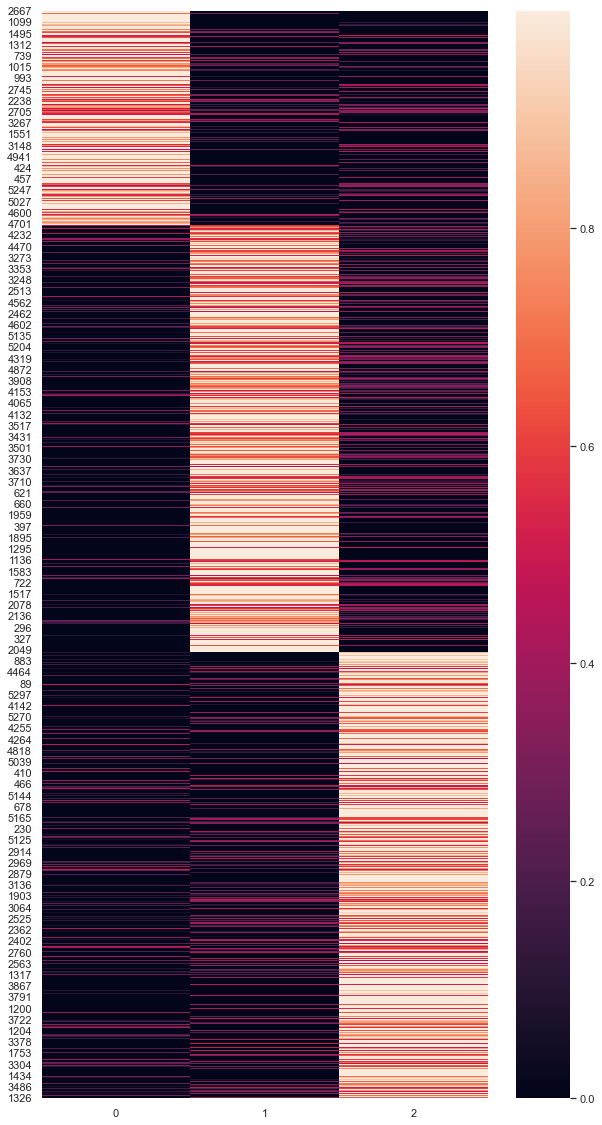

In [322]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic_dem_2015.drop(['max_topic'], axis = 1).loc[document_topic_dem_2015.drop(['max_topic'], axis = 1).idxmax(axis=1).sort_values().index])

<AxesSubplot:>

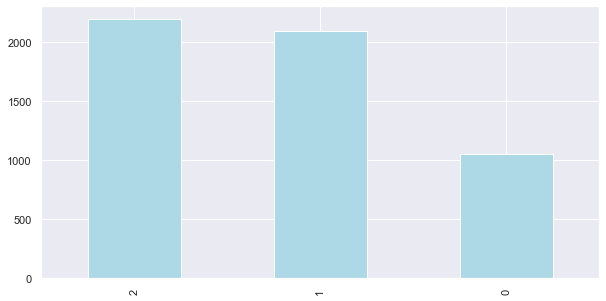

In [323]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic_dem_2015.drop(['max_topic'], axis = 1).idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [328]:
dem_2015["date"] = pd.to_datetime(dem_2015["date"])

# Global average per month
# g_all = dem_2015.set_index("date").groupby(pd.Grouper(freq="M"))["compound"].mean()
# g_ma = g_all.rolling(5, center=True, closed="both").mean()
# Average per party per month
g = pd.DataFrame(dem_2015.set_index("date").groupby([pd.Grouper(freq="M"), "max_topic"])["compound"].mean()).reset_index("max_topic")
g_0 = g[g["max_topic"] == 0]
g_1 = g[g["max_topic"] == 1]
g_2 = g[g["max_topic"] == 2]

In [349]:
# ci95_hi.append(m + 1.95*s/math.sqrt(c))
# ci95_lo.append(m - 1.95*s/math.sqrt(c))
g = pd.DataFrame(dem_2015.set_index("date").groupby([pd.Grouper(freq="M"), "max_topic"])["compound"].agg(['mean', 'count', 'std'])).reset_index("max_topic")
g['ci95_hi'] = (g['mean'] + 1.95*g['std']/g['count']**0.5)
g['ci95_lo'] = (g['mean'] - 1.95*g['std']/g['count']**0.5)
g_0 = g[g["max_topic"] == 0]
g_1 = g[g["max_topic"] == 1]
g_2 = g[g["max_topic"] == 2]

In [358]:
g_0

,max_topic,mean,count,std,ci95_hi,ci95_lo
date,,,,,,
2015-01-31,0.0,0.232620,54,0.467685,0.356726,0.108515
2015-02-28,0.0,0.093518,39,0.543520,0.263232,-0.076196
2015-03-31,0.0,0.126163,57,0.514494,0.259049,-0.006722
2015-04-30,0.0,0.133977,44,0.476317,0.274002,-0.006047
2015-05-31,0.0,0.117297,37,0.414697,0.250240,-0.015646
2015-06-30,0.0,0.049939,44,0.427923,0.175737,-0.075859
2015-07-31,0.0,-0.068903,94,0.576045,0.046955,-0.184761
2015-08-31,0.0,-0.017836,116,0.590211,0.089023,-0.124696
2015-09-30,0.0,-0.008695,130,0.545462,0.084594,-0.101983


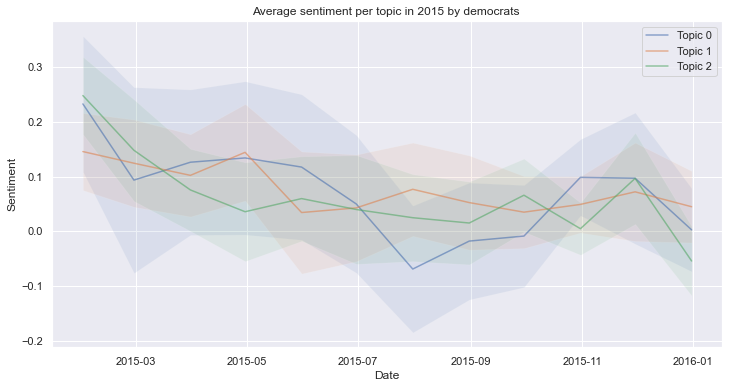

In [363]:
# Plot average score per month and party
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(g_0.index, g_0["mean"], label="Topic 0", alpha=0.6)
ax.fill_between(g_0.index, (g_0['ci95_lo']), (g_0['ci95_hi']), alpha=.1)

ax.plot(g_1.index, g_1["mean"], label="Topic 1", alpha=0.6)
ax.fill_between(g_1.index, (g_1['ci95_lo']), (g_1['ci95_hi']), alpha=.1)

ax.plot(g_2.index, g_2["mean"], label="Topic 2", alpha=0.6)
ax.fill_between(g_2.index, (g_2['ci95_lo']), (g_2['ci95_hi']),  alpha=.1)

plt.title("Average sentiment per topic in 2015 by democrats ")
plt.xlabel("Date")
plt.ylabel("Sentiment")

plt.legend()

plt.show() 

In [ ]:
# Republicans

In [418]:
rep_2015 = rep[(rep['date']> "2015-01-01") & (rep['date']< "2015-12-31")]
rep_2016 = rep[(rep['date']> "2016-01-01") & (rep['date']< "2016-12-31")]
rep_2017 = rep[(rep['date']> "2017-01-01") & (rep['date']< "2017-12-31")]
rep_2018 = rep[(rep['date']> "2018-01-01") & (rep['date']< "2018-12-31")]
rep_2019 = rep[(rep['date']> "2019-01-01") & (rep['date']< "2019-12-31")]
rep_2020 = rep[(rep['date']> "2020-01-01") & (rep['date']< "2020-12-31")]

In [366]:
processed_docs = []
for doc in nlp.pipe(rep_2015['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_rep_2015 = processed_docs
del processed_docs

In [367]:
processed_docs = []
for doc in nlp.pipe(rep_2016['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_rep_2016 = processed_docs
del processed_docs

In [368]:
processed_docs = []
for doc in nlp.pipe(rep_2017['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_rep_2017 = processed_docs
del processed_docs

In [369]:
processed_docs = []
for doc in nlp.pipe(rep_2018['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_rep_2018 = processed_docs
del processed_docs

In [370]:
processed_docs = []
for doc in nlp.pipe(rep_2019['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_rep_2019 = processed_docs
del processed_docs

In [371]:
processed_docs = []
for doc in nlp.pipe(rep_2020['quotation'], n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
    
docs_rep_2020 = processed_docs
del processed_docs

In [375]:
bigram__rep_15 = Phrases(docs_rep_2015, min_count=15)
for idx in range(len(docs_rep_2015)):
    for token in bigram__rep_15[docs_rep_2015[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_rep_2015[idx].append(token)
            
bigram__rep_16 = Phrases(docs_rep_2016, min_count=15)
for idx in range(len(docs_rep_2016)):
    for token in bigram__rep_16[docs_rep_2016[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_rep_2016[idx].append(token)
            
bigram__rep_17 = Phrases(docs_rep_2017, min_count=15)
for idx in range(len(docs_rep_2017)):
    for token in bigram__rep_17[docs_rep_2017[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_rep_2017[idx].append(token)
            
            
bigram__rep_18 = Phrases(docs_rep_2018, min_count=15)
for idx in range(len(docs_rep_2018)):
    for token in bigram__rep_18[docs_rep_2018[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_rep_2018[idx].append(token)
            
bigram__rep_19 = Phrases(docs_rep_2019, min_count=15)
for idx in range(len(docs_rep_2019)):
    for token in bigram__rep_19[docs_rep_2019[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_rep_2019[idx].append(token)

            
bigram__rep_20 = Phrases(docs_rep_2020, min_count=15)
for idx in range(len(docs_rep_2020)):
    for token in bigram__rep_20[docs_rep_2020[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs_rep_2020[idx].append(token)

In [378]:
dictionary_rep_2015 = Dictionary(docs_rep_2015)
dictionary_rep_2016 = Dictionary(docs_rep_2016)
dictionary_rep_2017 = Dictionary(docs_rep_2017)
dictionary_rep_2018 = Dictionary(docs_rep_2018)
dictionary_rep_2019 = Dictionary(docs_rep_2019)
dictionary_rep_2020 = Dictionary(docs_rep_2020)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5

dictionary_rep_2015.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_rep_2016.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_rep_2017.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_rep_2018.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_rep_2019.filter_extremes(no_below=min_wordcount, no_above=max_freq)
dictionary_rep_2020.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus_rep_2015 = [dictionary_rep_2015.doc2bow(doc) for doc in docs_rep_2015]
corpus_rep_2016 = [dictionary_rep_2016.doc2bow(doc) for doc in docs_rep_2016]
corpus_rep_2017 = [dictionary_rep_2017.doc2bow(doc) for doc in docs_rep_2017]
corpus_rep_2018 = [dictionary_rep_2018.doc2bow(doc) for doc in docs_rep_2018]
corpus_rep_2019 = [dictionary_rep_2019.doc2bow(doc) for doc in docs_rep_2019]
corpus_rep_2020 = [dictionary_rep_2020.doc2bow(doc) for doc in docs_rep_2020]

In [379]:
%time model_rep_2015 = gensim.models.LdaModel(corpus_rep_2015, num_topics=num_topics, \
                                  id2word=dictionary_rep_2015, \
                                  passes=15, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_rep_2015.keys()))

CPU times: user 32.5 s, sys: 344 ms, total: 32.9 s
Wall time: 33.4 s


In [380]:
%time model_rep_2016 = gensim.models.LdaModel(corpus_rep_2016, num_topics=num_topics, \
                                  id2word=dictionary_rep_2016, \
                                  passes=15, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_rep_2016.keys()))

CPU times: user 43.1 s, sys: 364 ms, total: 43.4 s
Wall time: 44.2 s


In [381]:
%time model_rep_2017 = gensim.models.LdaModel(corpus_rep_2017, num_topics=num_topics, \
                                  id2word=dictionary_rep_2017, \
                                  passes=15, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_rep_2017.keys()))

CPU times: user 1min 5s, sys: 646 ms, total: 1min 6s
Wall time: 1min 8s


In [382]:
%time model_rep_2018 = gensim.models.LdaModel(corpus_rep_2018, num_topics=num_topics, \
                                  id2word=dictionary_rep_2018, \
                                  passes=15, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_rep_2018.keys()))

CPU times: user 1min 18s, sys: 634 ms, total: 1min 18s
Wall time: 1min 20s


In [383]:
%time model_rep_2019 = gensim.models.LdaModel(corpus_rep_2019, num_topics=num_topics, \
                                  id2word=dictionary_rep_2019, \
                                  passes=15, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_rep_2019.keys()))

CPU times: user 1min 42s, sys: 1.08 s, total: 1min 44s
Wall time: 1min 46s


In [384]:
%time model_rep_2020 = gensim.models.LdaModel(corpus_rep_2020, num_topics=num_topics, \
                                  id2word=dictionary_rep_2020, \
                                  passes=15, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_rep_2020.keys()))

CPU times: user 31.1 s, sys: 291 ms, total: 31.4 s
Wall time: 32 s


In [385]:
%matplotlib inline
vis_rep_2015 = pyLDAvis.gensim_models.prepare(topic_model=model_rep_2015, corpus=corpus_rep_2015, dictionary=dictionary_rep_2015)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_rep_2015)
# Topic 1: Senate
# Topic 2: Hilary Clinton and elections
# TOpic 3: Planned parenthood

/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [386]:
%matplotlib inline
vis_rep_2016 = pyLDAvis.gensim_models.prepare(topic_model=model_rep_2016, corpus=corpus_rep_2016, dictionary=dictionary_rep_2016)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_rep_2016)
# Topic 1: Election (Trump is main candidate)
# Topic 2: Bernie Sanders
# TOpic 3: Obama

In [387]:
%matplotlib inline
vis_rep_2017 = pyLDAvis.gensim_models.prepare(topic_model=model_rep_2017, corpus=corpus_rep_2017, dictionary=dictionary_rep_2017)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_rep_2017)
# Topic 1: Healthcare 
# Topic 2: Elections candiates
# TOpic 3: Lost election for democrats

In [388]:
%matplotlib inline
vis_rep_2018 = pyLDAvis.gensim_models.prepare(topic_model=model_rep_2018, corpus=corpus_rep_2018, dictionary=dictionary_rep_2018)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_rep_2018)
# Topic 1: Nancy Peluso
# Topic 2: Healthcare
# TOpic 3: Elections Hilary and TRUMP

In [389]:
%matplotlib inline
vis_rep_2019 = pyLDAvis.gensim_models.prepare(topic_model=model_rep_2019, corpus=corpus_rep_2019, dictionary=dictionary_rep_2019)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_rep_2019)
# Topic 1: President (impeachmnent)
# Topic 2: Elections 
# TOpic 3: Trumps' campaign

In [390]:
%matplotlib inline
vis_rep_2020 = pyLDAvis.gensim_models.prepare(topic_model=model_rep_2020, corpus=corpus_rep_2020, dictionary=dictionary_rep_2020)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_rep_2020)
# Topic 1: Impeach president
# Topic 2: Election race
# TOpic 3: Money

/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darynabilodid/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [428]:
topics_rep_2015 = [model_rep_2015[corpus_rep_2015[i]] for i in range(len(docs_rep_2015))]

document_topic_rep_2015 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_rep_2015]) \
  .reset_index(drop=True).fillna(0)

document_topic_rep_2015['max_topic'] = document_topic_rep_2015.apply(lambda x: x.argmax(), axis=1)

rep_2015 = pd.concat([rep_2015.reset_index(), document_topic_rep_2015[['max_topic']]], axis=1,)

In [446]:
rep_2015

,index,Unnamed: 0,quotation,speaker,date,numOccurrences,congresses,unaccentedMiddleName,nickName,position,stateName,parties,NLTK score,neg,neu,pos,compound,max_topic
0,5339,39084,"over the past year, democrats have asked you r...",jason chaffetz,2015-11-04 09:30:00,12.0,"[{'position': 'Representative', 'congressNumbe...",NaN,NaN,Representative,UT,Republican,"{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'comp...",0.187,0.813,0.000,-0.5592,2
1,5340,39096,we want to pursue the facts. i know there are ...,jason chaffetz,2015-06-25 20:25:19,1.0,"[{'position': 'Representative', 'congressNumbe...",NaN,NaN,Representative,UT,Republican,"{'neg': 0.086, 'neu': 0.884, 'pos': 0.03, 'com...",0.086,0.884,0.030,-0.5267,1
2,5341,39098,"we're very united, republicans and democrats, ...",jason chaffetz,2015-03-12 23:00:03,15.0,"[{'position': 'Representative', 'congressNumbe...",NaN,NaN,Representative,UT,Republican,"{'neg': 0.172, 'neu': 0.665, 'pos': 0.163, 'co...",0.172,0.665,0.163,-0.0790,2
3,5342,39184,it's like we haven't closed the loop.... we're...,jason chaffetz,2015-08-06 23:38:15,17.0,"[{'position': 'Representative', 'congressNumbe...",NaN,NaN,Representative,UT,Republican,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.000,0.842,0.158,0.6652,0
4,5343,39197,i hope it's me. i'm trying to fight for that. ...,jason chaffetz,2015-10-04 17:57:51,1.0,"[{'position': 'Representative', 'congressNumbe...",NaN,NaN,Representative,UT,Republican,"{'neg': 0.263, 'neu': 0.625, 'pos': 0.112, 'co...",0.263,0.625,0.112,-0.9109,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,10750,472400,"i don't work for the republican party, or the ...",john faso,2015-09-16 03:31:31,3.0,"[{'position': 'Representative', 'congressNumbe...",J.,NaN,Representative,NY,Republican,"{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp...",0.000,0.616,0.384,0.7964,2
5407,10751,473150,the citizens of gibraltar have freely and demo...,george holding,2015-01-04 00:41:23,4.0,"[{'position': 'Representative', 'congressNumbe...",E.B.,NaN,Representative,NC,Republican,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.000,0.682,0.318,0.8658,2
5408,10752,474666,my first corruption case there was against a r...,jeffrey chiesa,2015-01-04 13:50:34,2.0,"[{'position': 'Senator', 'congressNumber': 113...",Scott,NaN,Senator,NJ,Republican,"{'neg': 0.05, 'neu': 0.888, 'pos': 0.062, 'com...",0.050,0.888,0.062,0.1280,1
5409,10753,474733,"back in 2012, amy klobuchar won by over 30 poi...",chip cravaack,2015-10-15 03:21:08,1.0,"[{'position': 'Representative', 'congressNumbe...",NaN,NaN,Representative,MN,Republican,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.000,0.789,0.211,0.7717,2


In [435]:
topics_rep_2016 = [model_rep_2016[corpus_rep_2016[i]] for i in range(len(docs_rep_2016))]

document_topic_rep_2016 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_rep_2016]) \
  .reset_index(drop=True).fillna(0)

document_topic_rep_2016['max_topic'] = document_topic_rep_2016.apply(lambda x: x.argmax(), axis=1)

rep_2016 = pd.concat([rep_2016.reset_index(), document_topic_rep_2016[['max_topic']]], axis=1,)

In [436]:
topics_rep_2017 = [model_rep_2017[corpus_rep_2017[i]] for i in range(len(docs_rep_2017))]

document_topic_rep_2017 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_rep_2017]) \
  .reset_index(drop=True).fillna(0)

document_topic_rep_2017['max_topic'] = document_topic_rep_2017.apply(lambda x: x.argmax(), axis=1)

rep_2017 = pd.concat([rep_2017.reset_index(), document_topic_rep_2017[['max_topic']]], axis=1,)

In [437]:
topics_rep_2018 = [model_rep_2018[corpus_rep_2018[i]] for i in range(len(docs_rep_2018))]

document_topic_rep_2018 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_rep_2018]) \
  .reset_index(drop=True).fillna(0)

document_topic_rep_2018['max_topic'] = document_topic_rep_2018.apply(lambda x: x.argmax(), axis=1)

rep_2018 = pd.concat([rep_2018.reset_index(), document_topic_rep_2018[['max_topic']]], axis=1,)

In [438]:
topics_rep_2019 = [model_rep_2019[corpus_rep_2019[i]] for i in range(len(docs_rep_2019))]

document_topic_rep_2019 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_rep_2019]) \
  .reset_index(drop=True).fillna(0)

document_topic_rep_2019['max_topic'] = document_topic_rep_2019.apply(lambda x: x.argmax(), axis=1)

rep_2019 = pd.concat([rep_2019.reset_index(), document_topic_rep_2019[['max_topic']]], axis=1,)

In [512]:
topics_rep_2020 = [model_rep_2020[corpus_rep_2020[i]] for i in range(len(docs_rep_2020))]

document_topic_rep_2020 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics_rep_2020]) \
  .reset_index(drop=True).fillna(0)

document_topic_rep_2020['max_topic'] = document_topic_rep_2020.apply(lambda x: x.argmax(), axis=1)

rep_2020 = pd.concat([rep_2020, document_topic_rep_2020[['max_topic']]], axis=1,)

In [450]:
rep_2015["date"] = pd.to_datetime(rep_2015["date"])
g = pd.DataFrame(rep_2015.set_index("date").groupby([pd.Grouper(freq="M"), "max_topic"])["compound"].agg(['mean', 'count', 'std'])).reset_index("max_topic")
g['ci95_hi'] = (g['mean'] + 1.95*g['std']/g['count']**0.5)
g['ci95_lo'] = (g['mean'] - 1.95*g['std']/g['count']**0.5)
g_0 = g[g["max_topic"] == 0]
g_1 = g[g["max_topic"] == 1]
g_2 = g[g["max_topic"] == 2]

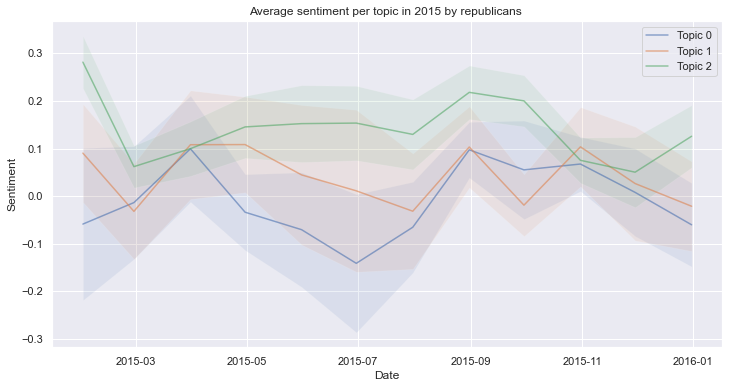

In [452]:
# Plot average score per month and party
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(g_0.index, g_0["mean"], label="Topic 0", alpha=0.6)
ax.fill_between(g_0.index, (g_0['ci95_lo']), (g_0['ci95_hi']), alpha=.1)

ax.plot(g_1.index, g_1["mean"], label="Topic 1", alpha=0.6)
ax.fill_between(g_1.index, (g_1['ci95_lo']), (g_1['ci95_hi']), alpha=.1)

ax.plot(g_2.index, g_2["mean"], label="Topic 2", alpha=0.6)
ax.fill_between(g_2.index, (g_2['ci95_lo']), (g_2['ci95_hi']),  alpha=.1)

plt.title("Average sentiment per topic in 2015 by republicans ")
plt.xlabel("Date")
plt.ylabel("Sentiment")

plt.legend()

plt.show() 

In [455]:
rep_2017["date"] = pd.to_datetime(rep_2017["date"])
g = pd.DataFrame(rep_2017.set_index("date").groupby([pd.Grouper(freq="M"), "max_topic"])["compound"].agg(['mean', 'count', 'std'])).reset_index("max_topic")
g['ci95_hi'] = (g['mean'] + 1.95*g['std']/g['count']**0.5)
g['ci95_lo'] = (g['mean'] - 1.95*g['std']/g['count']**0.5)
g_0 = g[g["max_topic"] == 0]
g_1 = g[g["max_topic"] == 1]
g_2 = g[g["max_topic"] == 2]

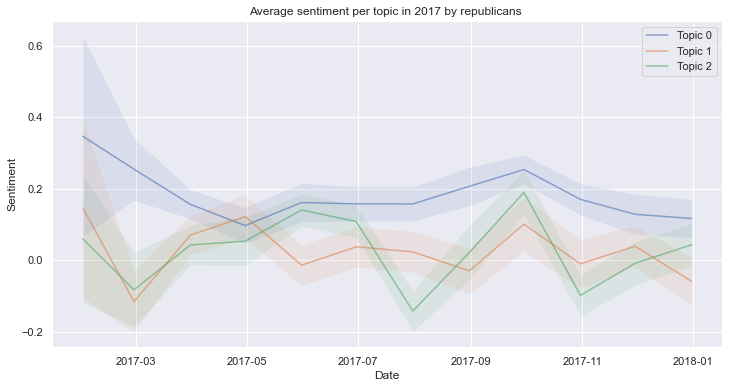

In [457]:
# Plot average score per month and party
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(g_0.index, g_0["mean"], label="Topic 0", alpha=0.6)
ax.fill_between(g_0.index, (g_0['ci95_lo']), (g_0['ci95_hi']), alpha=.1)

ax.plot(g_1.index, g_1["mean"], label="Topic 1", alpha=0.6)
ax.fill_between(g_1.index, (g_1['ci95_lo']), (g_1['ci95_hi']), alpha=.1)

ax.plot(g_2.index, g_2["mean"], label="Topic 2", alpha=0.6)
ax.fill_between(g_2.index, (g_2['ci95_lo']), (g_2['ci95_hi']),  alpha=.1)

plt.title("Average sentiment per topic in 2017 by republicans ")
plt.xlabel("Date")
plt.ylabel("Sentiment")

plt.legend()

plt.show() 

In [545]:
elec_2015 = dem_2015[dem_2015['max_topic'] == 2]
elec_2016 = dem_2016[dem_2016['max_topic'] == 0] 
elec_2017 = dem_2017[dem_2017['max_topic'] == 0]

elect_2019 = dem_2019[dem_2019['max_topic'] == 2]
elect_2020 = dem_2020[dem_2020['max_topic'] == 1]

elec_dem_2016 = elec_2015.append(elec_2016).append(elec_2017)

elec_dem_2020 = elect_2019.append(elect_2020)

In [546]:
elec_dem_2016 = elec_2015.append(elec_2016).append(elec_2017)

elec_dem_2020 = elect_2019.append(elect_2020)

In [547]:
relec_2015 = rep_2015[rep_2015['max_topic'] == 1]
relec_2016 = rep_2016[rep_2016['max_topic'] == 1] #0
relec_2017 = rep_2017[rep_2017['max_topic'] == 2]

relect_2019 = rep_2019[rep_2019['max_topic'] == 1]
relect_2020 = rep_2020[rep_2020['max_topic'] == 1]

In [548]:
elec_rep_2016 = relec_2015.append(relec_2016).append(relec_2017)

elec_rep_2020 = relect_2019.append(relect_2020)

In [549]:
total_elec_2016 = elec_dem_2016.append(elec_rep_2016)
total_elec_2020 = elec_dem_2020.append(elec_rep_2020)

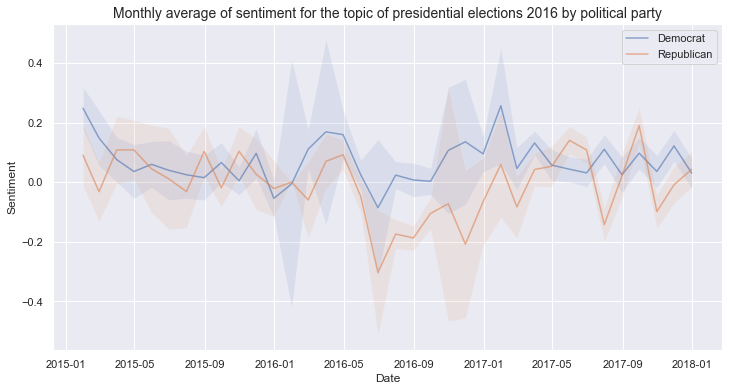

In [557]:
total_elec_2016["date"] = pd.to_datetime(total_elec_2016["date"])
g = pd.DataFrame(total_elec_2016.set_index("date").groupby([pd.Grouper(freq="M"), "parties"])["compound"].agg(['mean', 'count', 'std'])).reset_index("parties")
g['ci95_hi'] = (g['mean'] + 1.95*g['std']/g['count']**0.5)
g['ci95_lo'] = (g['mean'] - 1.95*g['std']/g['count']**0.5)
g_0 = g[g["parties"] == 'Democrat']
g_1 = g[g["parties"] == 'Republican']


# Plot average score per month and party
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(g_0.index, g_0["mean"], label="Democrat", alpha=0.6)
ax.fill_between(g_0.index, (g_0['ci95_lo']), (g_0['ci95_hi']), alpha=.1)

ax.plot(g_1.index, g_1["mean"], label="Republican", alpha=0.6)
ax.fill_between(g_1.index, (g_1['ci95_lo']), (g_1['ci95_hi']), alpha=.1)



plt.title("Monthly average of sentiment for the topic of presidential elections 2016 by political party",   fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sentiment")

plt.legend()

fname = f"./figures/elections_2016.png"
plt.savefig(fname)
plt.show() 

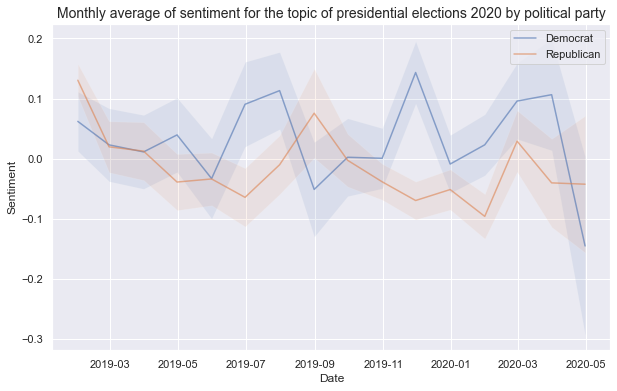

In [556]:
total_elec_2020["date"] = pd.to_datetime(total_elec_2020["date"])
g = pd.DataFrame(total_elec_2020.set_index("date").groupby([pd.Grouper(freq="M"), "parties"])["compound"].agg(['mean', 'count', 'std'])).reset_index("parties")
g['ci95_hi'] = (g['mean'] + 1.95*g['std']/g['count']**0.5)
g['ci95_lo'] = (g['mean'] - 1.95*g['std']/g['count']**0.5)
g_0 = g[g["parties"] == 'Democrat']
g_1 = g[g["parties"] == 'Republican']


# Plot average score per month and party
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(g_0.index, g_0["mean"], label="Democrat", alpha=0.6)
ax.fill_between(g_0.index, (g_0['ci95_lo']), (g_0['ci95_hi']), alpha=.1)

ax.plot(g_1.index, g_1["mean"], label="Republican", alpha=0.6)
ax.fill_between(g_1.index, (g_1['ci95_lo']), (g_1['ci95_hi']), alpha=.1)



plt.title("Monthly average of sentiment for the topic of presidential elections 2020 by political party",  fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sentiment")

plt.legend()

fname = f"./figures/elections_2020.png"
plt.savefig(fname)
plt.show() 